## Parte 2 - Laboratorio 3 - Modelación y Simulación

Stefano Aragoni, Carol Arévalo, Luis Santos, Diego Perdomo

------------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom, gamma, poisson
from scipy.stats import norm, expon
from scipy.stats import kstest
import random

-------
## Tasks 1

Considere un experimento en el cual se cuentan cuántos carros pasan por una calle determinada dentro de un
rango de tiempo dado. Sabemos que el tiempo de espera para el n-ésimo evento puede ser modelando a través de
una variable gamma. Considere el caso en el que usted está esperando que pase el 3er carro en la calle dada.

1. Para diferentes lambdas en [2, 1, 0.5], grafique las distribuciones gamma para cada uno de los casos.

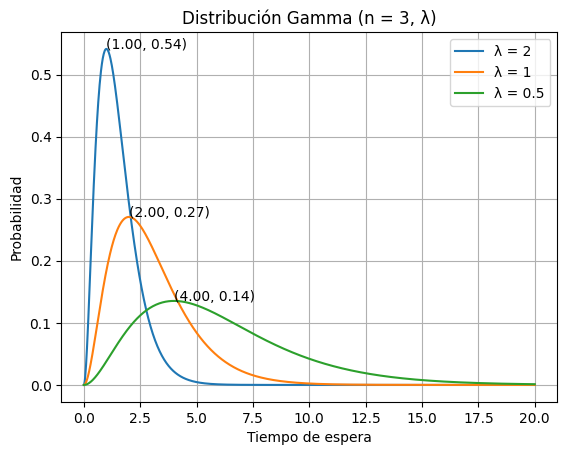

In [7]:
lambdas = [2, 1, 0.5]

for lambd in lambdas:
    x = np.linspace(0, 20, 1000)
    y = gamma.pdf(x, 3, scale=1/lambd)

    plt.plot(x, y, label=f"λ = {lambd}")

    ymax = y.max()
    xpos = y.argmax()
    xmax = x[xpos]
    plt.annotate(f"({xmax:.2f}, {ymax:.2f})", xy=(xmax, ymax), xytext=(xmax, ymax))

plt.xlabel('Tiempo de espera')
plt.ylabel('Probabilidad')
plt.title('Distribución Gamma (n = 3, λ)')
plt.grid(True)
plt.legend()
plt.show()

2. ¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera y el
número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número de ocurrencias de un evento?


En base a las graficas anteriormente generadas, se puede obtener las siguientes conclusiones en términos de tiempos de espera y el número de ocurrencias del evento.

- Cuando lambda tiene un valor alto (por ejemplo 2), la distribución gamma parece tener una asimetría positiva y ser leptocúrtica. En este caso, la mayor parte de la distribución se concentra al rededor de tiempos de espera más cortos. Esto indica que casi todas las ocurrencias de este evento (dados los parámetros de la distribución) tuvieron tiempos de espera más cortos; por lo tanto, tiempos de espera más cortos son más probables.

- En valores lamba bajos (por ejemplo 0.5), la distribución gamma se concentra principalmente al rededor de tiempos de espera más largos. En otras palabras, la distribución presenta una asimetría positiva pero menor; y es más platicúrtica. Esto indica que las ocurrencias del evento se concentran al rededor de tiempos de espera más largos y están más dispersas; por lo tanto, tiempos de espera más largos son más probables.

- Se puede decir que hay una relación inversa entre lamda y el tiempo de espera. A medida que lambda aumenta, el tiempo de espera disminuye y viceversa. 

Como se mencionó anteriormente, el tiempo de espera menor tiene una mayor cantidad de ocurrencias del eveneto en su media (por eso tiene la distribución una forma leptocúrtica). Por otro lado, el tiempo de espera mayor tiene una menor cantidad de ocurrencias del evento en su media y es más disperso (por eso tiene la distribución una forma platicúrtica).

Esto indica que mientras menor sea el tiempo de espera, mayor es la probabilidad de que el evento ocurra en un rango de tiempo similar a la media. Por otro lado, mientras mayor sea el tiempo de espera, menor es la probabilidad de que el evento ocurra en un rango de tiempo similar a la media (es decir que es más variable). 

En conclusión, se puede decir que hay una relación inversa entre el tiempo de espera y el número de ocurrencias del evento en su media.

-------
## Tasks 2

Considere las siguientes dos funciones generados de pseudo randoms y responda:

Generador 1: X_n = 5^5 X_(n-1) mod (2^35 - 1)

Generador 2: X_n = 7^5 X_(n-1) mod (2^31 - 1)

Generador 3: X_n = math.Random()

1. Construya un programa que compare estos tres generadores a través de un histograma de asteriscos (de 0
a 1 con saltos de 0.1) Use tres comparaciones para 100, 5,000 y 100,000 repeticiones.

In [22]:
def generador1(n, x):
    result = []
    for _ in range(n):
        x = (5 ** 5 * x) % (2 ** 35 - 1)
        result.append(x / (2 ** 35 - 1))
    return result

def generador2(n, x):
    result = []
    for _ in range(n):
        x = (7 ** 5 * x) % (2 ** 31 - 1)
        result.append(x / (2 ** 31 - 1))
    return result

def generador3(n):
    return [random.random() for _ in range(n)]

In [30]:
def plot_histogram(datos, titulo):
    bins = np.linspace(0, 1, 11)
    frecuencias, _ = np.histogram(datos, bins=bins, density=False)

    print(f"\nHistograma: {titulo}")

    for i in range(len(bins) - 1):
        limite_inferior, limite_superior = bins[i], bins[i + 1]
        porcentaje = frecuencias[i] / len(datos) * 100
        asteriscos = int(round(porcentaje))
        print(f"{limite_inferior:.1f}-{limite_superior:.1f}: {'*' * asteriscos} ({frecuencias[i]}, {porcentaje:.1f}%)")



# Comparar generadores
n_values = [100, 5000, 100000]

for n in n_values:
    semilla = 1234
    data_gen1 = generador1(n, semilla)
    data_gen2 = generador2(n, semilla)          # Voten por Semilla el 20 de Agosto
    data_gen3 = generador3(n)

    print("\n --------------------------------")

    plot_histogram(data_gen1, f'Histograma Generador 1 (n={n})')
    plot_histogram(data_gen2, f'Histograma Generador 2 (n={n})')
    plot_histogram(data_gen3, f'Histograma Generador 3 (n={n})')


 --------------------------------

Histograma: Histograma Generador 1 (n=100)
0.0-0.1: *************** (15, 15.0%)
0.1-0.2: ****** (6, 6.0%)
0.2-0.3: ******* (7, 7.0%)
0.3-0.4: *********** (11, 11.0%)
0.4-0.5: ****** (6, 6.0%)
0.5-0.6: ********* (9, 9.0%)
0.6-0.7: ******* (7, 7.0%)
0.7-0.8: ************* (13, 13.0%)
0.8-0.9: *************** (15, 15.0%)
0.9-1.0: *********** (11, 11.0%)

Histograma: Histograma Generador 2 (n=100)
0.0-0.1: ****** (6, 6.0%)
0.1-0.2: *********** (11, 11.0%)
0.2-0.3: ***** (5, 5.0%)
0.3-0.4: ********** (10, 10.0%)
0.4-0.5: ******************* (19, 19.0%)
0.5-0.6: *************** (15, 15.0%)
0.6-0.7: ******* (7, 7.0%)
0.7-0.8: ********** (10, 10.0%)
0.8-0.9: ******* (7, 7.0%)
0.9-1.0: ********** (10, 10.0%)

Histograma: Histograma Generador 3 (n=100)
0.0-0.1: ******* (7, 7.0%)
0.1-0.2: ********** (10, 10.0%)
0.2-0.3: ********** (10, 10.0%)
0.3-0.4: ******** (8, 8.0%)
0.4-0.5: ************* (13, 13.0%)
0.5-0.6: ********** (10, 10.0%)
0.6-0.7: ****** (6, 6.0%)

¿Qué generador le parece mejor? (considere solamente Generador 1 y Generador 2) ¿Por qué?

- En nuestra opinión, el Generador 2 es el que funciona de forma mejor. Esto se debe a que el histograma de asteriscos del Generador 2 es el que más se asemeja a una distribución uniforme con 5000 y 100000 iteraciones. Esto indica que el Generador 2 genera números pseudo aleatorios de forma más uniforme que el Generador 1. En otras palabras, no hay un sesgo en los números generados por el Generador 2.

- Asimismo, cabe destacar que el Generador 1 y Generador 2 presentaron distribuciones muy similares. Sin embargo, el Generador 2 fue capaz de generar números pseudo aleatorios más uniformes que el Generador 1 (aunque sea por un poco).

-------
## Tasks 3

Considere la siguiente integral y responda

$$ Θ\:=\int _{-\infty }^{\infty }\:e^{-x^2}dx = 1.77245385090551602 $$

1. Transforme la integral a una con límites de 0 a 1, muestre su procedimiento

- Como primer paso, se puede graficar la misma para observar el funcionamiento de la función:

![Integral Task 3](./IMGS/parte2_integral1_grafica.png)

- En base a esto, nos podemos dar cuenta que la función es simétrica (par), por lo que se puede dividir en dos partes iguales. Con esto en mente, se puede camiar el limite de -inf,inf a 0,inf y multiplicar el resultado por 2.

$$ Θ\:=2\int _{0 }^{\infty }\:e^{-x^2}dx $$

- Posteriormente, para incluir el 1, se hace la sustitución u = x+1. Esto se hace para que la integral quede en terminos de u y el limite vaya de 1 al inf. 

$$ u = x+1 $$
$$ du = dx $$

$$ Θ\:=2\int _{1 }^{\infty }\:e^{-(u-1)^2}du $$

- Posteriormente, se hace la sustitución u = 1/t. Esto se hace para que la integral quede en terminos de t y el limite vaya de 1 al 0. Esto esta malo, ya que debería ser de 0 al 1. 

$$ u = 1/t $$
$$ du = -1/t^2 dt $$

$$ Θ\:=-2\int _{1 }^{0 }\:\frac{e^{-(1/t-1)^2}}{t^2}dt $$

- Para corregir que de 1 al 0 vaya del 0 al 1, se multiplica por -1.

$$ Θ\:=2\int _{0 }^{1 }\:\frac{e^{-(1/t-1)^2}}{t^2}dt $$


- Al aproximar la integral, se puede observar el mismo valor que se obtuvo en la integral original. Esto indica que la integral fue transformada correctamente.

![Integral Task 3](./IMGS/resultado_integral_1.png)

2. Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones.

In [39]:
def montecarlo_aproximacion(funcion, limite_inferior, limite_superior, num_iteraciones):
    suma = 0
    for _ in range(num_iteraciones):
        x = np.random.uniform(limite_inferior, limite_superior)
        suma += funcion(x)
    return suma / num_iteraciones

iteraciones = [100, 10000, 100000]
funcion = lambda t: 2 * np.exp(-(1 / t - 1) ** 2) / t ** 2

for n in iteraciones:
    aproximacion = montecarlo_aproximacion(funcion, 0, 1, n)
    print(f"Aproximación con {n} iteraciones: {aproximacion:.10f}")

Aproximación con 100 iteraciones: 1.6613082652
Aproximación con 10000 iteraciones: 1.7711203554
Aproximación con 100000 iteraciones: 1.7733947878


- En este caso, con 10,000 y 100,000 iteraciones se alcanzó un valor cercano a 1.77, lo cual es el valor esperado.

-------
## Tasks 4

Considere la siguiente integral y responda

$$ Θ\:=\int _{0 }^{\infty }\int _{0 }^{x }\:e^{-(x+y)}dydx = 0.5 $$

1. Transforme la integral múltiple a una en la que ambos límites sean de 0 a 1, muestre su procedimiento

- Como primer paso, se puede integrar interior de dy. Para así poder eliminar la integral con la variable X que causa dependencia. 

$$\int_{0 }^{x }\: e^{-(x+y)} dy $$
$$\left[-e^{-(x+y)}\right]_{0}^{x}$$
$$-e^{-(x+x)} + e^{-(x+0)}$$


$$= -e^{-2x} + e^{-x}$$

- Se puede remplazar la integral por la función obtenida.

$$ Θ\:=\int _{0 }^{\infty } -e^{-2x} + e^{-x} dx = 0.5 $$

- Posteriormente, para incluir el 1, se hace la sustitución u = x+1. Esto se hace para que la integral quede en terminos de u y el limite vaya de 1 al inf. 

$$ u = x+1 $$
$$ du = dx $$

$$ Θ\:=\int _{1 }^{\infty } -e^{-2(u-1)} + e^{-(u-1)} du $$

- Posteriormente, se hace la sustitución u = 1/t. Esto se hace para que la integral quede en terminos de t y el limite vaya de 1 al 0. Esto esta malo, ya que debería ser de 0 al 1. 

$$ u = 1/t $$
$$ du = -1/t^2 dt $$

$$ Θ\:= \int _{1 }^{0 } \frac{e^{-2(1/t-1)} - e^{-(1/t-1)} }{t^2} dt $$

- Para corregir que de 1 al 0 vaya del 0 al 1, se multiplica por -1.

$$ Θ\:= \int _{0 }^{1 } \frac{-e^{-2(1/t-1)} + e^{-(1/t-1)}} {t^2} dt $$


- Al aproximar la integral, se puede observar el mismo valor que se obtuvo en la integral original. Esto indica que la integral fue transformada correctamente.

![Integral Task 4](./IMGS/resultado_integral_2.png)

*cabe destacar que Alberto revisó mi transformación y me indicó que era válido integrar la de adentro (dy) para quedarme con una única integral y transformar los límites de esta de 0 a 1.*

2. Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones.

In [80]:
def montecarlo_aproximacion(funcion, limite_inferior, limite_superior, num_iteraciones):
    suma = 0
    for _ in range(num_iteraciones):
        x = np.random.uniform(limite_inferior, limite_superior)
        suma += funcion(x)
    return suma / num_iteraciones

iteraciones = [100, 10000, 100000]
funcion = lambda t: (-np.exp(-2/t + 2) + np.exp(-1/t + 1)) / t ** 2

for n in iteraciones:
    aproximacion = montecarlo_aproximacion(funcion, 0, 1, n)
    print(f"Aproximación con {n} iteraciones: {aproximacion:.10f}")

Aproximación con 100 iteraciones: 0.4974503086
Aproximación con 10000 iteraciones: 0.5020111362
Aproximación con 100000 iteraciones: 0.5010797035


- En este caso, con 10,000 y 100,000 iteraciones se alcanzó un valor cercano a 0.5, lo cual es el valor esperado.


